# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [4]:
!pip install --upgrade seaborn
!pip install --upgrade pandas

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# STEP #2: IMPORT DATASET

In [6]:
fuel_economy_df = pd.read_csv('FuelEconomy.csv')
fuel_economy_df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [7]:
fuel_economy_df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [8]:
fuel_economy_df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [9]:
fuel_economy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [10]:
fuel_economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

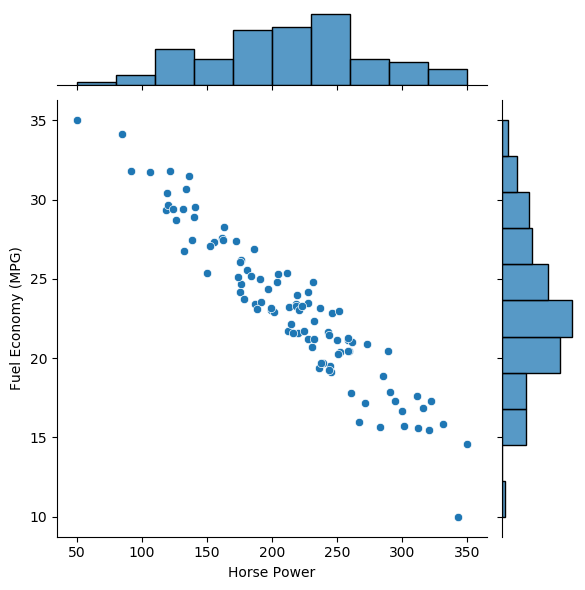

In [12]:
sns.jointplot(x='Horse Power', y= 'Fuel Economy (MPG)', data = fuel_economy_df)

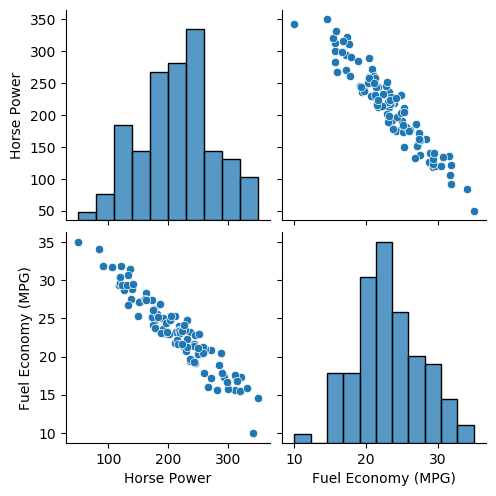

In [13]:
sns.pairplot(fuel_economy_df)

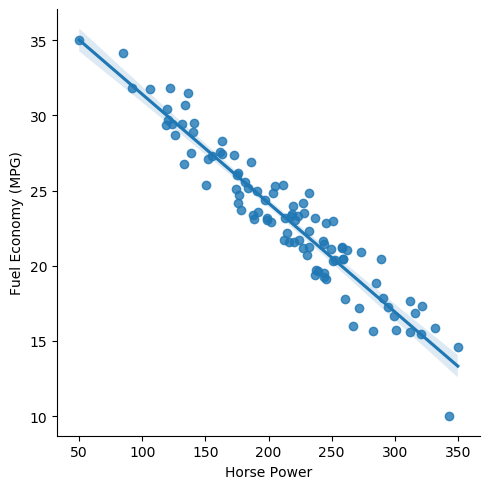

In [14]:
sns.lmplot(x = 'Horse Power', y='Fuel Economy (MPG)', data=fuel_economy_df)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [16]:
X = fuel_economy_df[['Horse Power']]
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [17]:
y = fuel_economy_df['Fuel Economy (MPG)']
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# STEP#5: TRAIN THE MODEL

In [27]:
X_train.shape

(75, 1)

In [28]:
from sklearn.linear_model import LinearRegression


In [29]:
regressor = LinearRegression(fit_intercept = True)

In [30]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-0.07311178]
Linear Model Coefficient (b):  38.77544710694919


# STEP#6: TEST THE MODEL 

In [33]:
y_predict = regressor.predict(X_test)
y_predict

array([25.91960976, 21.39874423, 18.92986736, 24.22925009, 23.22172284,
       14.52437165, 24.7588354 , 20.44564417, 28.66666608, 31.00676769,
       32.09008643, 15.9285847 , 19.63097264, 20.80307906, 17.50816547,
       24.03417725, 23.89196062, 20.50598274, 22.15128095, 35.11985799,
       26.87207822, 21.824122  , 26.15316132, 23.09410354, 16.87624148])

In [34]:
y_test

5     24.173571
90    19.723462
6     17.163583
80    23.172223
20    23.204745
86    15.837968
13    23.556729
53    20.291766
34    27.473415
87    31.722566
28    31.806706
32    15.618956
73    21.050399
52    22.849711
51    17.873266
58    22.937653
88    24.826199
81    21.139429
92    24.181109
37    35.000000
95    27.418661
27    24.829824
41    27.387012
76    22.183092
71    16.693369
Name: Fuel Economy (MPG), dtype: float64

Text(0.5, 1.0, 'HP vs. MPG (training dataset)')

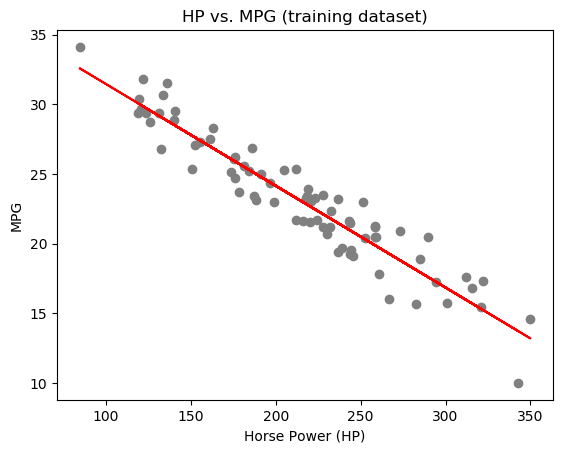

In [35]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (training dataset)')

In [38]:
HP = [[230]]
y_predict = regressor.predict(HP)
y_predict

array([21.95973717])

array([689.16364939])

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION